Import biblioteki **TensorFlow** ([https://www.tensorflow.org/](https://www.tensorflow.org/)) z której będziemy korzystali w **uczeniu maszynowym**:

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

**Dwa gangi**

In [2]:
import pandas as pd
data = pd.read_csv('dane_2.csv')
data

,Unnamed: 0,x,y,label
0,0,4.542370,1.239985,0.0
1,1,3.362026,3.005807,0.0
2,2,2.015592,2.248925,0.0
3,3,2.464453,0.783281,0.0
4,4,3.751106,1.087531,0.0
...,...,...,...,...
1995,1995,6.060069,5.157456,1.0
1996,1996,6.105566,5.628897,1.0
1997,1997,7.892450,9.247378,1.0
1998,1998,6.455157,5.098539,1.0


W zbiorze danych 1000 punktów (indeksy 0-999) ma przypisaną etykietę 0, drugi 1000 punktów (indeksy 1000-1999) ma przypisaną etykietę 1.

Konwersja z DataFrame do tablicy np.array:

In [3]:
data_new = np.array(data)
data_new

array([[0.00000000e+00, 4.54236966e+00, 1.23998542e+00, 0.00000000e+00],
       [1.00000000e+00, 3.36202576e+00, 3.00580678e+00, 0.00000000e+00],
       [2.00000000e+00, 2.01559185e+00, 2.24892501e+00, 0.00000000e+00],
       ...,
       [1.99700000e+03, 7.89245031e+00, 9.24737815e+00, 1.00000000e+00],
       [1.99800000e+03, 6.45515687e+00, 5.09853926e+00, 1.00000000e+00],
       [1.99900000e+03, 8.38697159e+00, 6.80380202e+00, 1.00000000e+00]])

In [4]:
A = np.array([[1,2,3,4,5],[7,8,-3,1,6],[9,1,6,-4,1],[11,-12,-3,4,0]])
A

array([[  1,   2,   3,   4,   5],
       [  7,   8,  -3,   1,   6],
       [  9,   1,   6,  -4,   1],
       [ 11, -12,  -3,   4,   0]])

In [5]:
A[1:,2:4]

array([[-3,  1],
       [ 6, -4],
       [-3,  4]])

Usunięcie pierwszej kolumny:

In [6]:
data_new = data_new[:,1:]
data_new

array([[4.54236966, 1.23998542, 0.        ],
       [3.36202576, 3.00580678, 0.        ],
       [2.01559185, 2.24892501, 0.        ],
       ...,
       [7.89245031, 9.24737815, 1.        ],
       [6.45515687, 5.09853926, 1.        ],
       [8.38697159, 6.80380202, 1.        ]])

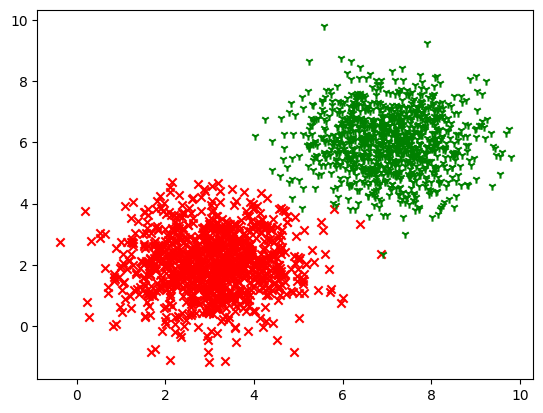

In [7]:
plt.scatter(data_new[0:1000,0],data_new[0:1000,1], c='r', marker='x')
plt.scatter(data_new[1000:,0],data_new[1000:,1], c='g', marker='1')
plt.show()

# Z wykorzystaniem biblioteki Keras

In [13]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Input

Definiujemy model:

In [17]:
model = Sequential()

Dodajemy **jedną warstwę** (Dense) z **jednym neuronem** (units=1) z **biasem** (use_bias=True) i **sigmoidalną (unipolarna) funkcją aktywacji** (activation="sigmoid"):

In [18]:
#model.add(Dense(units = 120, use_bias=True, input_dim=2, activation = "relu"))
#model.add(Dense(units = 240, use_bias=True, activation = "relu"))
model.add(Input(shape=(2,)))
model.add(Dense(units = 1, use_bias=True, activation = "sigmoid"))

Definiujemy **optymalizator** i **błąd** (entropia krzyżowa). **Współczynnik uczenia = 0.1**

In [19]:
#opt = tf.keras.optimizers.Adam(learning_rate=0.1)
opt = tf.keras.optimizers.SGD(learning_rate=0.1)

In [20]:
model.compile(loss='binary_crossentropy',optimizer=opt)

Informacja o modelu:

In [21]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3 (12.00 B)

 Trainable params: 3 (12.00 B)

 Non-trainable params: 0 (0.00 B)

Przygotowanie danych:

In [22]:
data_points = data_new[:,0:2]
labels = data_new[:,2]

Proces **uczenia**. Parametr **validation_split** określa jaka część zbioru uczącego jest wykorzystywana do validacji modelu.

In [23]:
epochs = 300
h = model.fit(data_points,labels, verbose=1, epochs=epochs, batch_size=100, validation_split=0.2)

Epoch 1/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.2835 - val_loss: 0.3554
Epoch 2/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6119 - val_loss: 0.5091
Epoch 3/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5274 - val_loss: 0.4185
Epoch 4/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4659 - val_loss: 0.4088
Epoch 5/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4257 - val_loss: 0.2658
Epoch 6/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4067 - val_loss: 0.3206
Epoch 7/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3763 - val_loss: 0.2699
Epoch 8/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3499 - val_loss: 0.2392
Epoch 9/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3270 - val_loss: 0.2192
Epoch 10/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3141 - val_loss: 0.2484
Epoch 11/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2934 - val_loss: 0.2145
Epoch 12/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.

In [24]:
Loss = h.history['loss']
Val_Loss = h.history['val_loss']

Sprawdźmy jakie są **wartości wag**:

In [25]:
weights = model.get_weights()

print(weights[0])
print(weights[1])    #bias

[[0.9859663]
 [1.363599 ]]
[-10.546938]


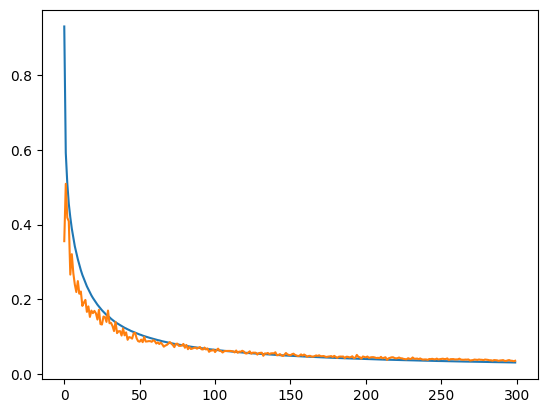

In [26]:
plt.plot(Loss)
plt.plot(Val_Loss)
plt.show()

Sprawdzamy działanie modelu dla punktu o współrzędnych **x** i **y**:

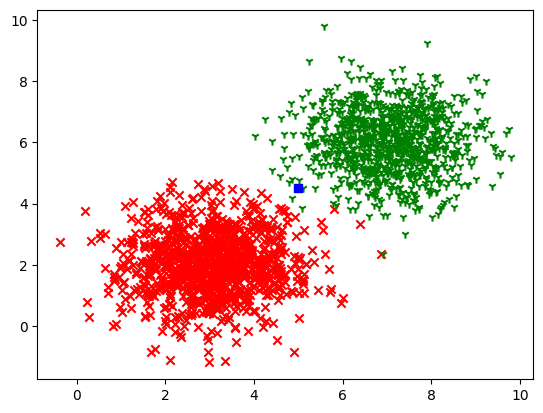

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


array([[0.62693465]], dtype=float32)

In [28]:
x=5.0
y=4.5
plt.scatter(data_new[0:1000,0],data_new[0:1000,1], c='r', marker='x')
plt.scatter(data_new[1000:,0],data_new[1000:,1], c='g', marker='1')
plt.scatter(x,y,c='b', marker='s')
plt.show()
model.predict(np.array([[x,y]]))

# Z wykorzystaniem tf.gradient (gradient liczony wprost)

DO UZUPEŁNIENIA